In [1]:
import pandas as pd

In [7]:
train = pd.read_csv("data/train.csv")


In [10]:
print(train.shape)
train.head(20)

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [11]:
train["target"].value_counts(normalize=True)


target
0    0.963552
1    0.036448
Name: proportion, dtype: float64

In [12]:
# # Count null values for each column

missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

In [13]:
# check all the data types

bin_cols = [c for c in train.columns if "_bin" in c]
cat_cols = [c for c in train.columns if "_cat" in c]
cont_cols = [c for c in train.columns if c not in bin_cols + cat_cols + ["id", "target"]]

print("Binari:", len(bin_cols))
print("Categorici:", len(cat_cols))
print("Continui:", len(cont_cols))


Binari: 17
Categorici: 14
Continui: 26


No missing values

Feature mix bin/cat/cont

Dataset altamente sbilanciato

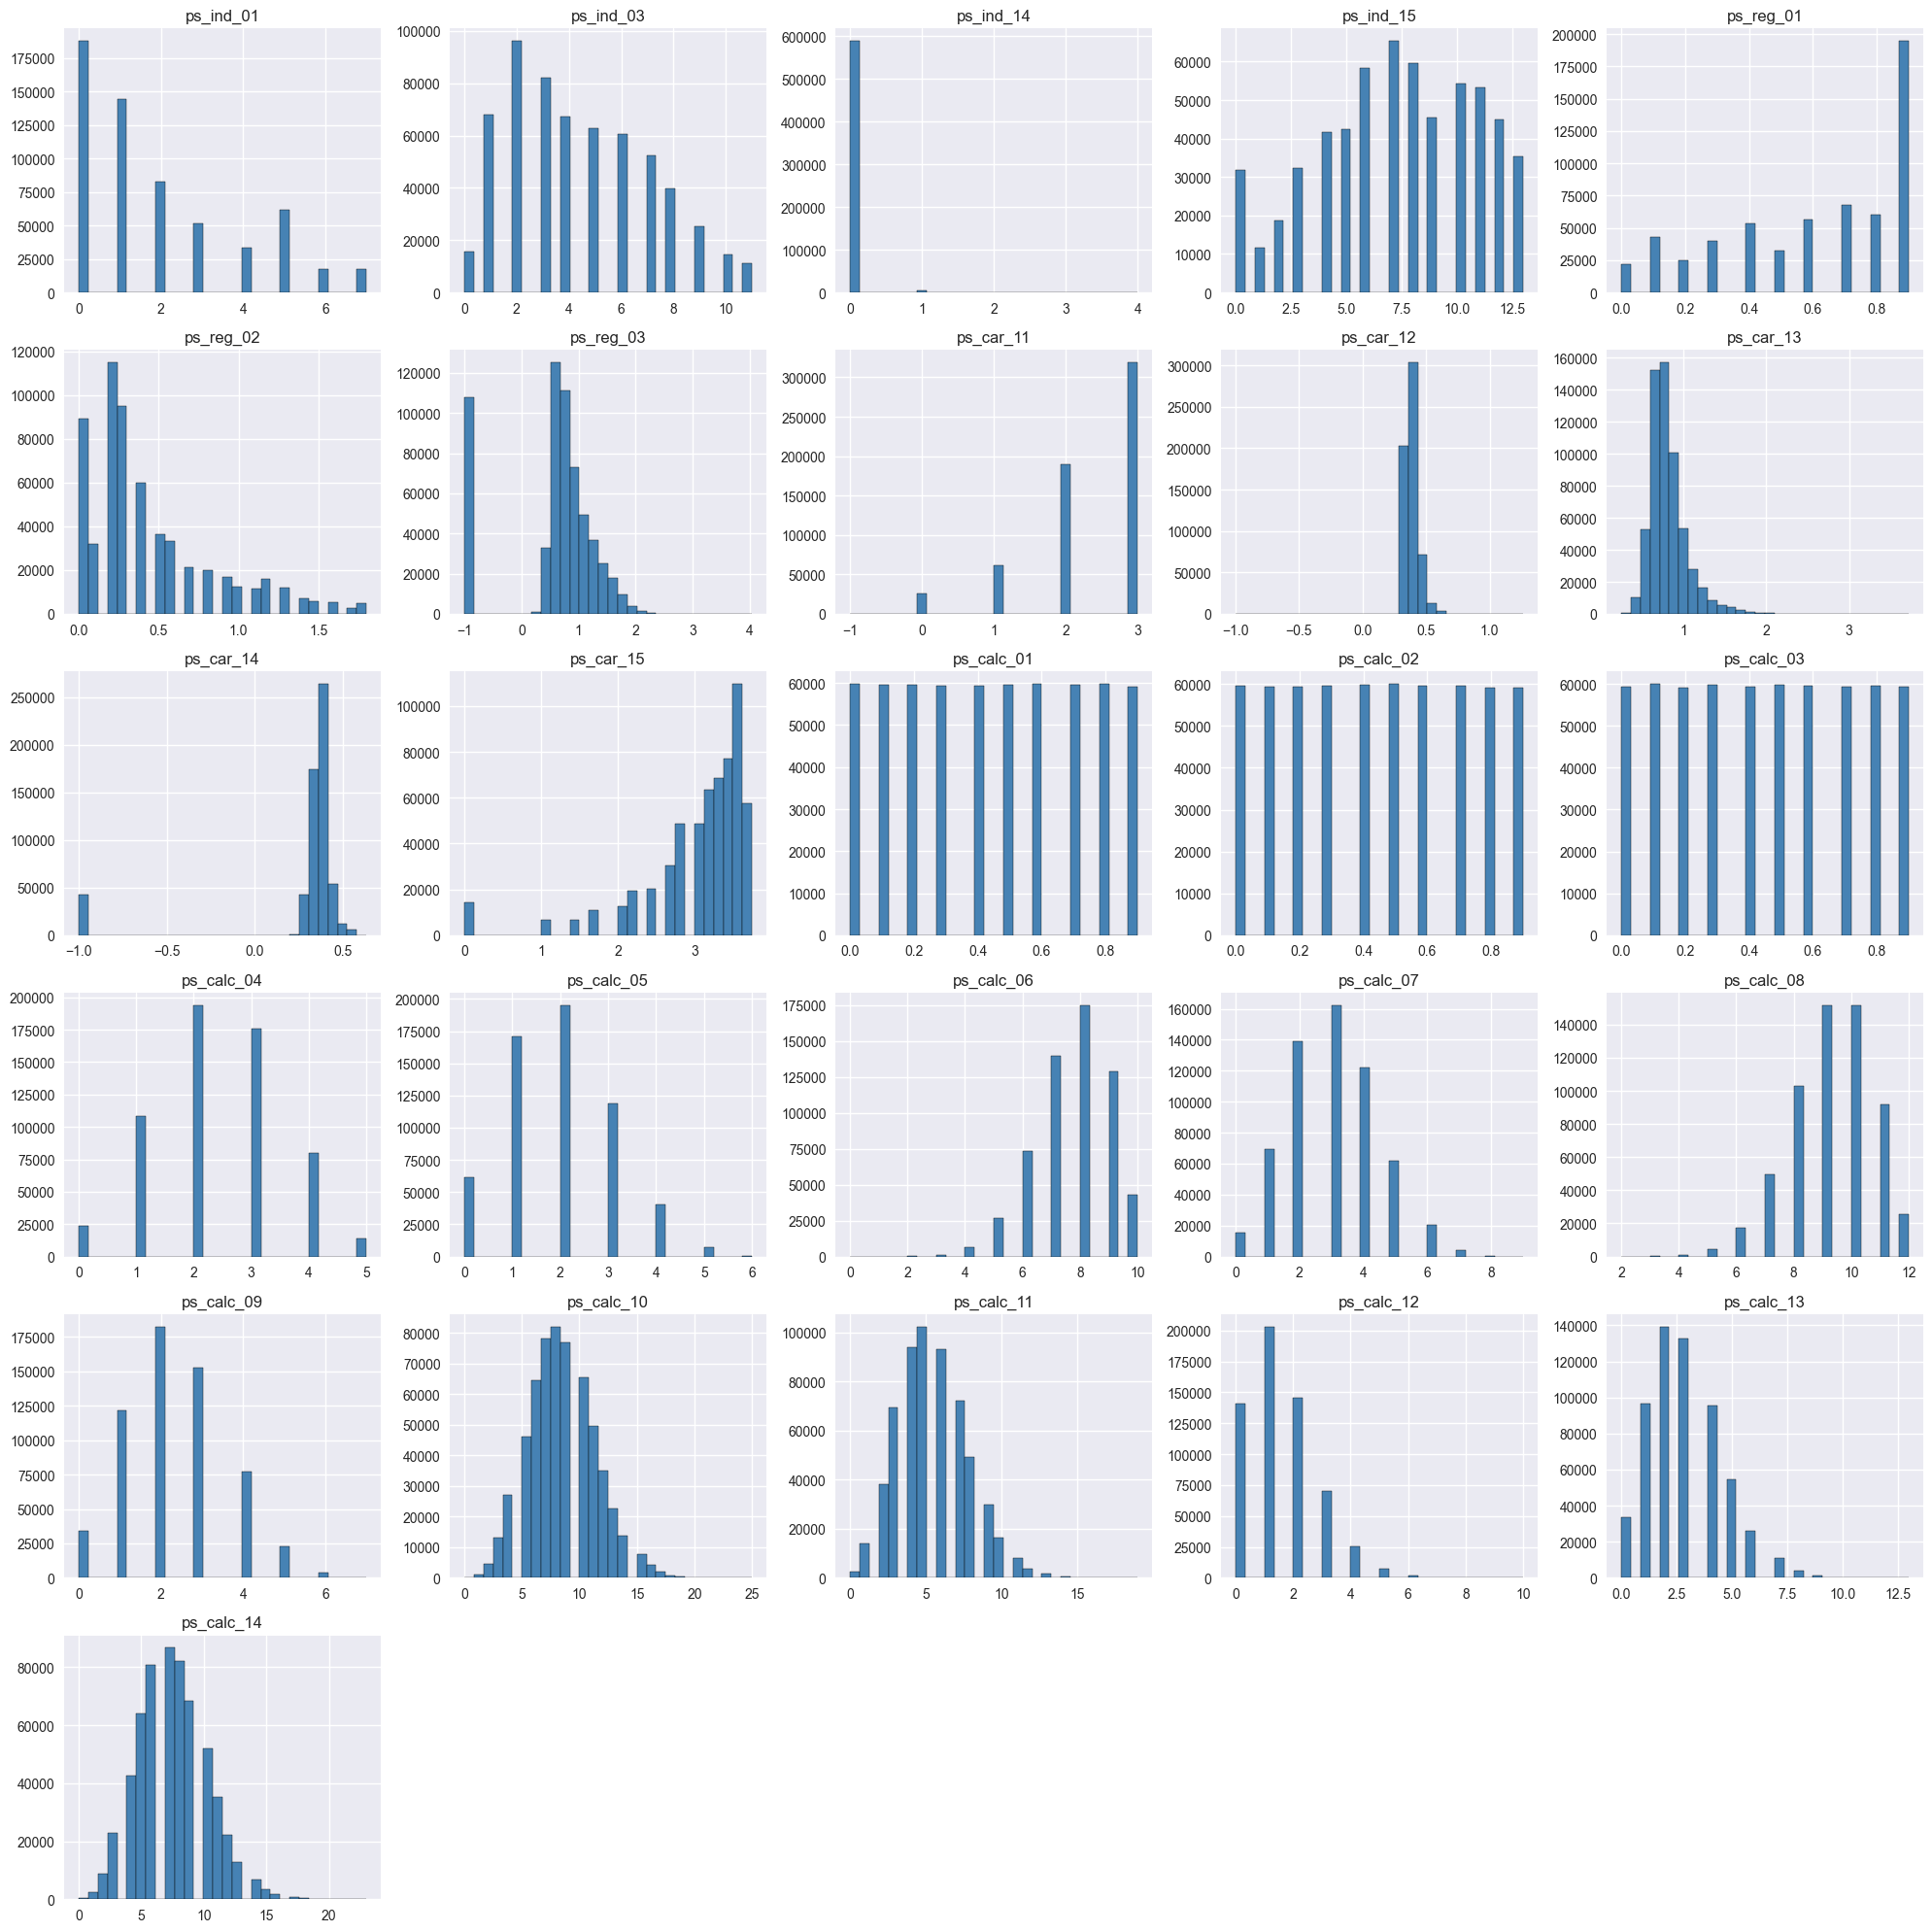

In [14]:
#. check the distribution of continuous variables

import matplotlib.pyplot as plt

# set stile
plt.style.use("seaborn-v0_8")

# numero di colonne continue
n_cont = len(cont_cols)

# set up griglia (5 colonne per riga)
fig, axes = plt.subplots(nrows=(n_cont // 5) + 1, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    train[col].hist(bins=30, ax=axes[i], color="steelblue", edgecolor="black")
    axes[i].set_title(col)

# rimuovi assi vuoti
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
# correlazioni delle continue con il target
corr = train[cont_cols + ["target"]].corr()["target"].sort_values(ascending=False)
corr


target        1.000000
ps_car_13     0.053899
ps_car_12     0.038790
ps_reg_02     0.034800
ps_reg_03     0.030888
ps_car_15     0.027667
ps_reg_01     0.022888
ps_ind_01     0.018570
ps_ind_03     0.008360
ps_ind_14     0.007443
ps_calc_03    0.001907
ps_calc_01    0.001782
ps_calc_14    0.001362
ps_calc_02    0.001360
ps_calc_10    0.001061
ps_calc_05    0.000771
ps_calc_09    0.000719
ps_calc_11    0.000371
ps_calc_06    0.000082
ps_calc_04    0.000033
ps_calc_07   -0.000103
ps_calc_13   -0.000446
ps_calc_08   -0.001006
ps_calc_12   -0.001133
ps_car_11    -0.001213
ps_car_14    -0.004474
ps_ind_15    -0.021506
Name: target, dtype: float64

In [17]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X_cat = train[cat_cols].copy()
y = train["target"]

# Encoding numerico delle categoriche (se già sono numeriche non serve, ma è più sicuro)
for col in X_cat.columns:
    X_cat[col] = LabelEncoder().fit_transform(X_cat[col])

chi_scores, p_values = chi2(X_cat, y)

# Risultati ordinati
chi_results = pd.Series(chi_scores, index=cat_cols).sort_values(ascending=False)
chi_results


ps_car_04_cat    4119.848102
ps_car_03_cat     784.994499
ps_ind_05_cat     657.263413
ps_car_11_cat     398.028918
ps_car_06_cat     365.754306
ps_car_05_cat     217.048402
ps_car_01_cat     106.448036
ps_car_07_cat      49.733060
ps_car_02_cat      45.656476
ps_car_08_cat      41.357908
ps_ind_04_cat       8.957760
ps_car_09_cat       6.935752
ps_ind_02_cat       4.771921
ps_car_10_cat       0.005429
dtype: float64